## Optimistic Greedy

In [3]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.bandits.bandit import BanditEnv
from lib.simulation import Experiment
from lib.envs.bandits.policy import Policy
from lib.utils import randargmax

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
class OptimisticGreedy(Policy):
    def __init__(self, num_actions, initial_value):
        Policy.__init__(self, num_actions)
        self.name = "Optimistic Greedy"
        
        self.initial_value = initial_value
        self.total_counts = np.zeros(num_actions, dtype = np.float32)
        self.total_rewards = np.zeros(num_actions, dtype = np.float32)
        
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = self.initial_value
        current_action = randargmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal action: 6


<Figure size 720x360 with 0 Axes>

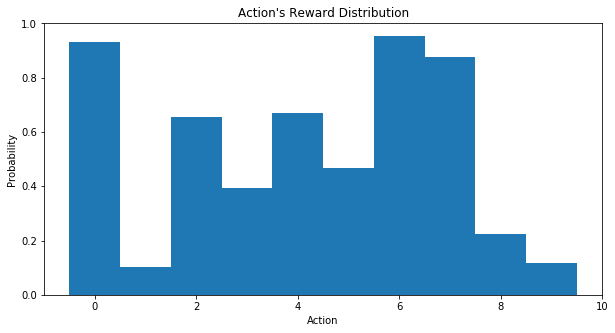

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9274 
Average Regret: 0.023272713155358636
Arm pulls: [9.886e+03 1.000e+00 2.000e+00 1.000e+00 8.000e+00 2.000e+00 1.400e+01
 8.300e+01 2.000e+00 1.000e+00]


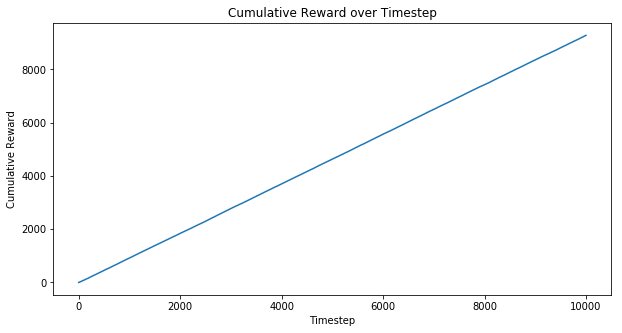

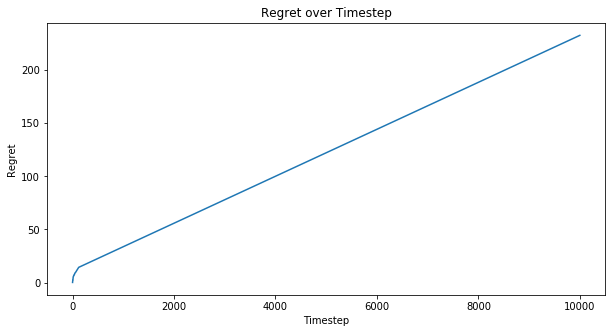

In [8]:
evaluation_seed = 5016
num_actions = 10
trials = 10000
distribution = "bernoulli"
R = 3
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal action: 4


<Figure size 720x360 with 0 Axes>

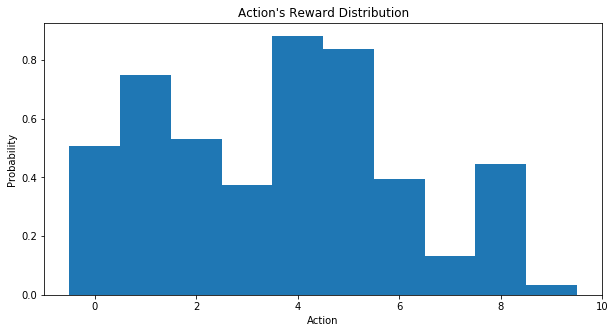

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8744 
Average Regret: 0.00047176541233893483
Arm pulls: [1.000e+00 1.000e+00 2.000e+00 1.000e+00 9.989e+03 1.000e+00 1.000e+00
 1.000e+00 2.000e+00 1.000e+00]


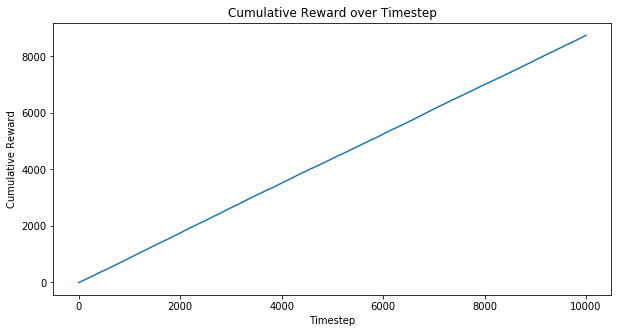

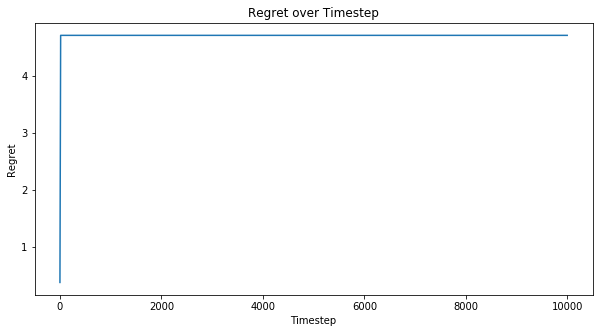

In [11]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"
R = 1
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)